### Notebook Goals
In previous phases we have seen that using a classic cross validation returns optimistic results, and we have proven it performing a custom cross validation that relies on a leave-one-subject-out strategy, and we have seen how accuracy had a little drop.
Now, what we want to test with this last notebook is:
- We want to see how the classifier chosen in __classifier_comparison__ behaves when unseen data come from our phone.
- Is it possible that the model had a form of overfitting on phone sensors? How this behaves with different sensitivity and scaling?


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import sys
sys.path.append("creation_functions")
from creation_functions.utilities import create_time_series

In [2]:
df_train = pd.read_csv("processed_dataset/preprocessed_dataset.csv", index_col=0)
df_test_correlated_null = create_time_series(mode="phone")
df_test = df_test_correlated_null.fillna(df_test_correlated_null.groupby('class').transform('mean'))
for column in df_test.columns:
    if column not in df_train.drop(["subject", "trial"], axis=1).columns:
        df_test = df_test.drop(column, axis=1)

X_train = df_train.drop(["class", "subject", "trial"], axis=1)
y_train = df_train["class"]

X_test = df_test.drop("class", axis=1)
y_test = df_test["class"]

K_FEATURES = 40

Processing file: honor20readings_complete\dataset_honor20_dws1.csv
Processing file: honor20readings_complete\dataset_honor20_dws2.csv
Processing file: honor20readings_complete\dataset_honor20_dws3.csv
Processing file: honor20readings_complete\dataset_honor20_dws4.csv
Processing file: honor20readings_complete\dataset_honor20_dws5.csv
Processing file: honor20readings_complete\dataset_honor20_jog1.csv
Processing file: honor20readings_complete\dataset_honor20_jog2.csv
Processing file: honor20readings_complete\dataset_honor20_sit1.csv
Processing file: honor20readings_complete\dataset_honor20_sit2.csv
Processing file: honor20readings_complete\dataset_honor20_std1.csv
Processing file: honor20readings_complete\dataset_honor20_std2.csv
Processing file: honor20readings_complete\dataset_honor20_ups1.csv
Processing file: honor20readings_complete\dataset_honor20_ups2.csv
Processing file: honor20readings_complete\dataset_honor20_ups3.csv
Processing file: honor20readings_complete\dataset_honor20_ups4

In [3]:
X_train

,gravity.x_mean,gravity.x_std,gravity.x_kurtosis,gravity.x_skewness,gravity.y_mean,gravity.y_std,gravity.y_kurtosis,gravity.y_skewness,gravity.z_mean,gravity.z_std,...,userAcceleration.zX#1,userAcceleration.zX#2,userAcceleration.zX#3,userAcceleration.zX#4,userAcceleration.zX#5,userAcceleration.zP#1,userAcceleration.zP#2,userAcceleration.zP#3,userAcceleration.zP#4,userAcceleration.zP#5
0,0.660836,0.055586,-0.262111,-0.253176,0.697236,0.062177,-0.011653,-0.217895,-0.196612,0.177478,...,0.000667,0.000933,0.001200,0.001733,0.002133,13.807348,10.305709,10.737154,7.903655,6.034663
1,0.591719,0.045982,-0.953223,-0.036783,0.763231,0.049877,-0.753548,-0.227500,-0.193589,0.158775,...,0.000533,0.001067,0.001733,0.002133,0.002533,5.954942,11.828021,8.168617,3.514331,6.316686
2,0.616612,0.050241,-0.386998,-0.047354,0.765423,0.042016,-0.739176,-0.256167,-0.096352,0.142455,...,0.000267,0.000933,0.001333,0.001867,0.002267,4.205105,13.926414,10.132591,7.850723,4.440575
3,0.819881,0.062960,0.824574,-1.283976,0.522868,0.095616,-0.470297,0.386937,-0.049620,0.196990,...,0.000267,0.000533,0.000800,0.001333,0.001600,5.260687,5.717704,9.357244,3.591812,3.649510
4,0.850191,0.031659,-0.952690,-0.160122,0.480892,0.059932,-0.588734,0.116549,-0.115385,0.167149,...,0.000533,0.001067,0.001333,0.001600,0.001867,7.168658,21.722648,4.473481,7.613701,5.723588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8877,-0.122797,0.276033,-1.487179,0.271106,0.918917,0.030907,-0.370218,0.329522,-0.205328,0.145176,...,0.000267,0.000667,0.001067,0.001467,0.001867,8.398322,23.333486,16.774102,19.093016,18.715154
8878,-0.074504,0.269702,-1.412785,0.323312,0.924469,0.036752,-0.400090,-0.486239,-0.203869,0.155097,...,0.000267,0.000667,0.001067,0.001467,0.001867,2.715984,28.300697,19.680617,24.616760,20.037615
8879,-0.039299,0.269917,-1.401116,0.319121,0.927167,0.040061,-0.407391,-0.781868,-0.211300,0.140053,...,0.000267,0.000667,0.001067,0.001467,0.001867,4.697057,23.213458,15.414131,17.698143,17.489799
8880,-0.043965,0.299500,-1.464768,0.187227,0.910849,0.048021,-0.476545,-0.657987,-0.224120,0.161279,...,0.000267,0.000667,0.001067,0.001467,0.001867,8.323046,22.765793,11.518568,18.601501,16.335227


In [4]:
X_test

,gravity.x_mean,gravity.x_std,gravity.x_kurtosis,gravity.x_skewness,gravity.y_mean,gravity.y_std,gravity.y_kurtosis,gravity.y_skewness,gravity.z_mean,gravity.z_std,...,userAcceleration.zX#1,userAcceleration.zX#2,userAcceleration.zX#3,userAcceleration.zX#4,userAcceleration.zX#5,userAcceleration.zP#1,userAcceleration.zP#2,userAcceleration.zP#3,userAcceleration.zP#4,userAcceleration.zP#5
0,-0.650382,0.527008,-0.167205,-0.721758,-9.118544,0.876717,0.415669,1.392297,-2.842300,1.862884,...,0.000267,0.000667,0.001067,0.001467,0.001867,158.022452,198.474050,198.530796,82.470683,94.971136
1,1.094818,0.566703,-0.553905,0.248236,-8.842842,0.995226,0.036039,1.245707,3.520089,1.751207,...,0.000267,0.000667,0.001200,0.001733,0.002133,152.349636,175.597258,133.358740,48.783263,129.695879
2,-0.390457,0.534799,0.053318,-0.831914,-9.181418,0.775140,1.056561,1.534616,-2.771843,1.773522,...,0.000267,0.000667,0.001067,0.001467,0.002000,145.439540,169.750971,181.133907,53.820686,118.585110
3,0.222503,0.979884,1.829189,-0.990047,-9.288494,0.479051,0.795073,1.179977,1.977820,2.175333,...,0.000400,0.000933,0.001467,0.001867,0.002533,233.767416,171.715915,254.111581,111.842828,56.146004
4,1.966668,1.449917,-1.027993,-0.055480,-8.978130,0.542118,-0.684450,0.434360,2.175679,2.132977,...,0.000400,0.000933,0.001467,0.002000,0.002400,338.795423,293.702947,543.532488,151.580011,99.963273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,-1.162956,0.532576,-0.161326,-0.751992,-9.139786,0.446255,-1.099025,0.282086,-2.342106,2.304649,...,0.000133,0.000533,0.000800,0.001067,0.001467,80.913958,144.736661,234.329165,98.381310,121.416987
132,-0.916106,0.379351,-0.100349,-0.197221,-9.290095,0.462918,-0.599417,0.759557,-1.794326,2.333374,...,0.000133,0.000533,0.000800,0.001200,0.001467,89.993161,165.231530,226.562714,92.134265,143.458642
133,-1.037364,0.416039,-0.329309,-0.479700,-9.287087,0.474560,-0.662249,0.808414,-1.617095,2.414165,...,0.000133,0.000533,0.000800,0.001067,0.001333,116.144032,166.925777,203.253042,76.968052,107.344593
134,-0.462995,0.484355,0.560462,0.368578,-9.253167,0.460322,-0.569602,0.697150,-1.914477,2.494036,...,0.000533,0.000800,0.001067,0.001467,0.001733,151.754114,254.892151,110.876963,101.479298,67.088117


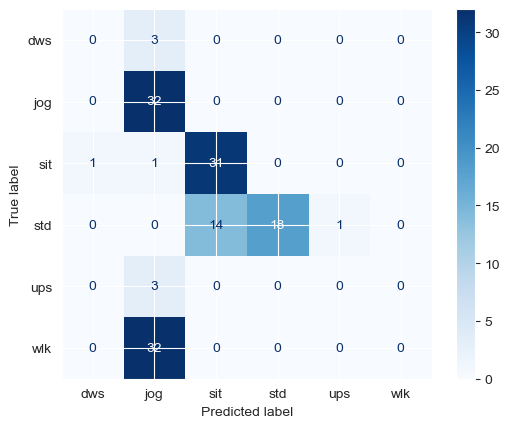

In [5]:
from sklearn.feature_selection import SelectKBest
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import RobustScaler
from imblearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier

tree_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=K_FEATURES)),
    ("classifier", RandomForestClassifier())
])
tree_pipe.fit(X_train, y_train)
y_pred = tree_pipe.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=df_train["class"].unique(), cmap=plt.cm.Blues)

[Text(0.5, 0, 'Dataset'), Text(0, 0.5, 'Accuracy')]

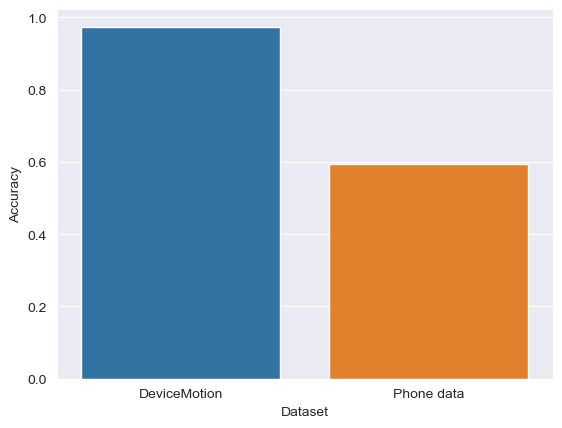

In [6]:
from sklearn.model_selection import train_test_split
import seaborn as sns

count=0
y_test = y_test.to_numpy()
for i in range(0, y_pred.size):
    if y_pred[i]==y_test[i]:
        count+=1
acc_phone=count/y_pred.size

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, shuffle=True, random_state=42)
tree_pipe.fit(X_train, y_train)
y_pred = tree_pipe.predict(X_test)
count=0
for true, predicted in zip(y_test, y_pred):
    if true==predicted:
        count+=1
acc=count/y_pred.size

ax=sns.barplot(x=["DeviceMotion","Phone data"], y=[acc, acc_phone])
ax.set(xlabel="Dataset", ylabel="Accuracy")

We can easily see that the data obtained by our phone is often misclassified, obtaining a really low accuracy compared to the score obtained classifying only readings coming from the DeviceMotion dataset. Looking at the confusion matrix we can see the most relevant miss classifications. In particular standing is always recognized as sitting, walking as jogging, and upstairs and downstairs are never recognized properly. Why do we obtain those poor results? Let’s take a look at jogging into the 2 different datasets, to compare the signals.

In [1]:
df_jog_deviceMotion=pd.read_csv("A_DeviceMotion_data/jog_9/sub_1.csv").drop(["Unnamed: 0", "attitude.roll", "attitude.pitch", "attitude.yaw"], axis=1)[100:400]
df_jog_honor=pd.read_csv("honor20readings_complete/dataset_honor20_jog1.csv").drop("class", axis=1)[100:400]

NameError: name 'pd' is not defined

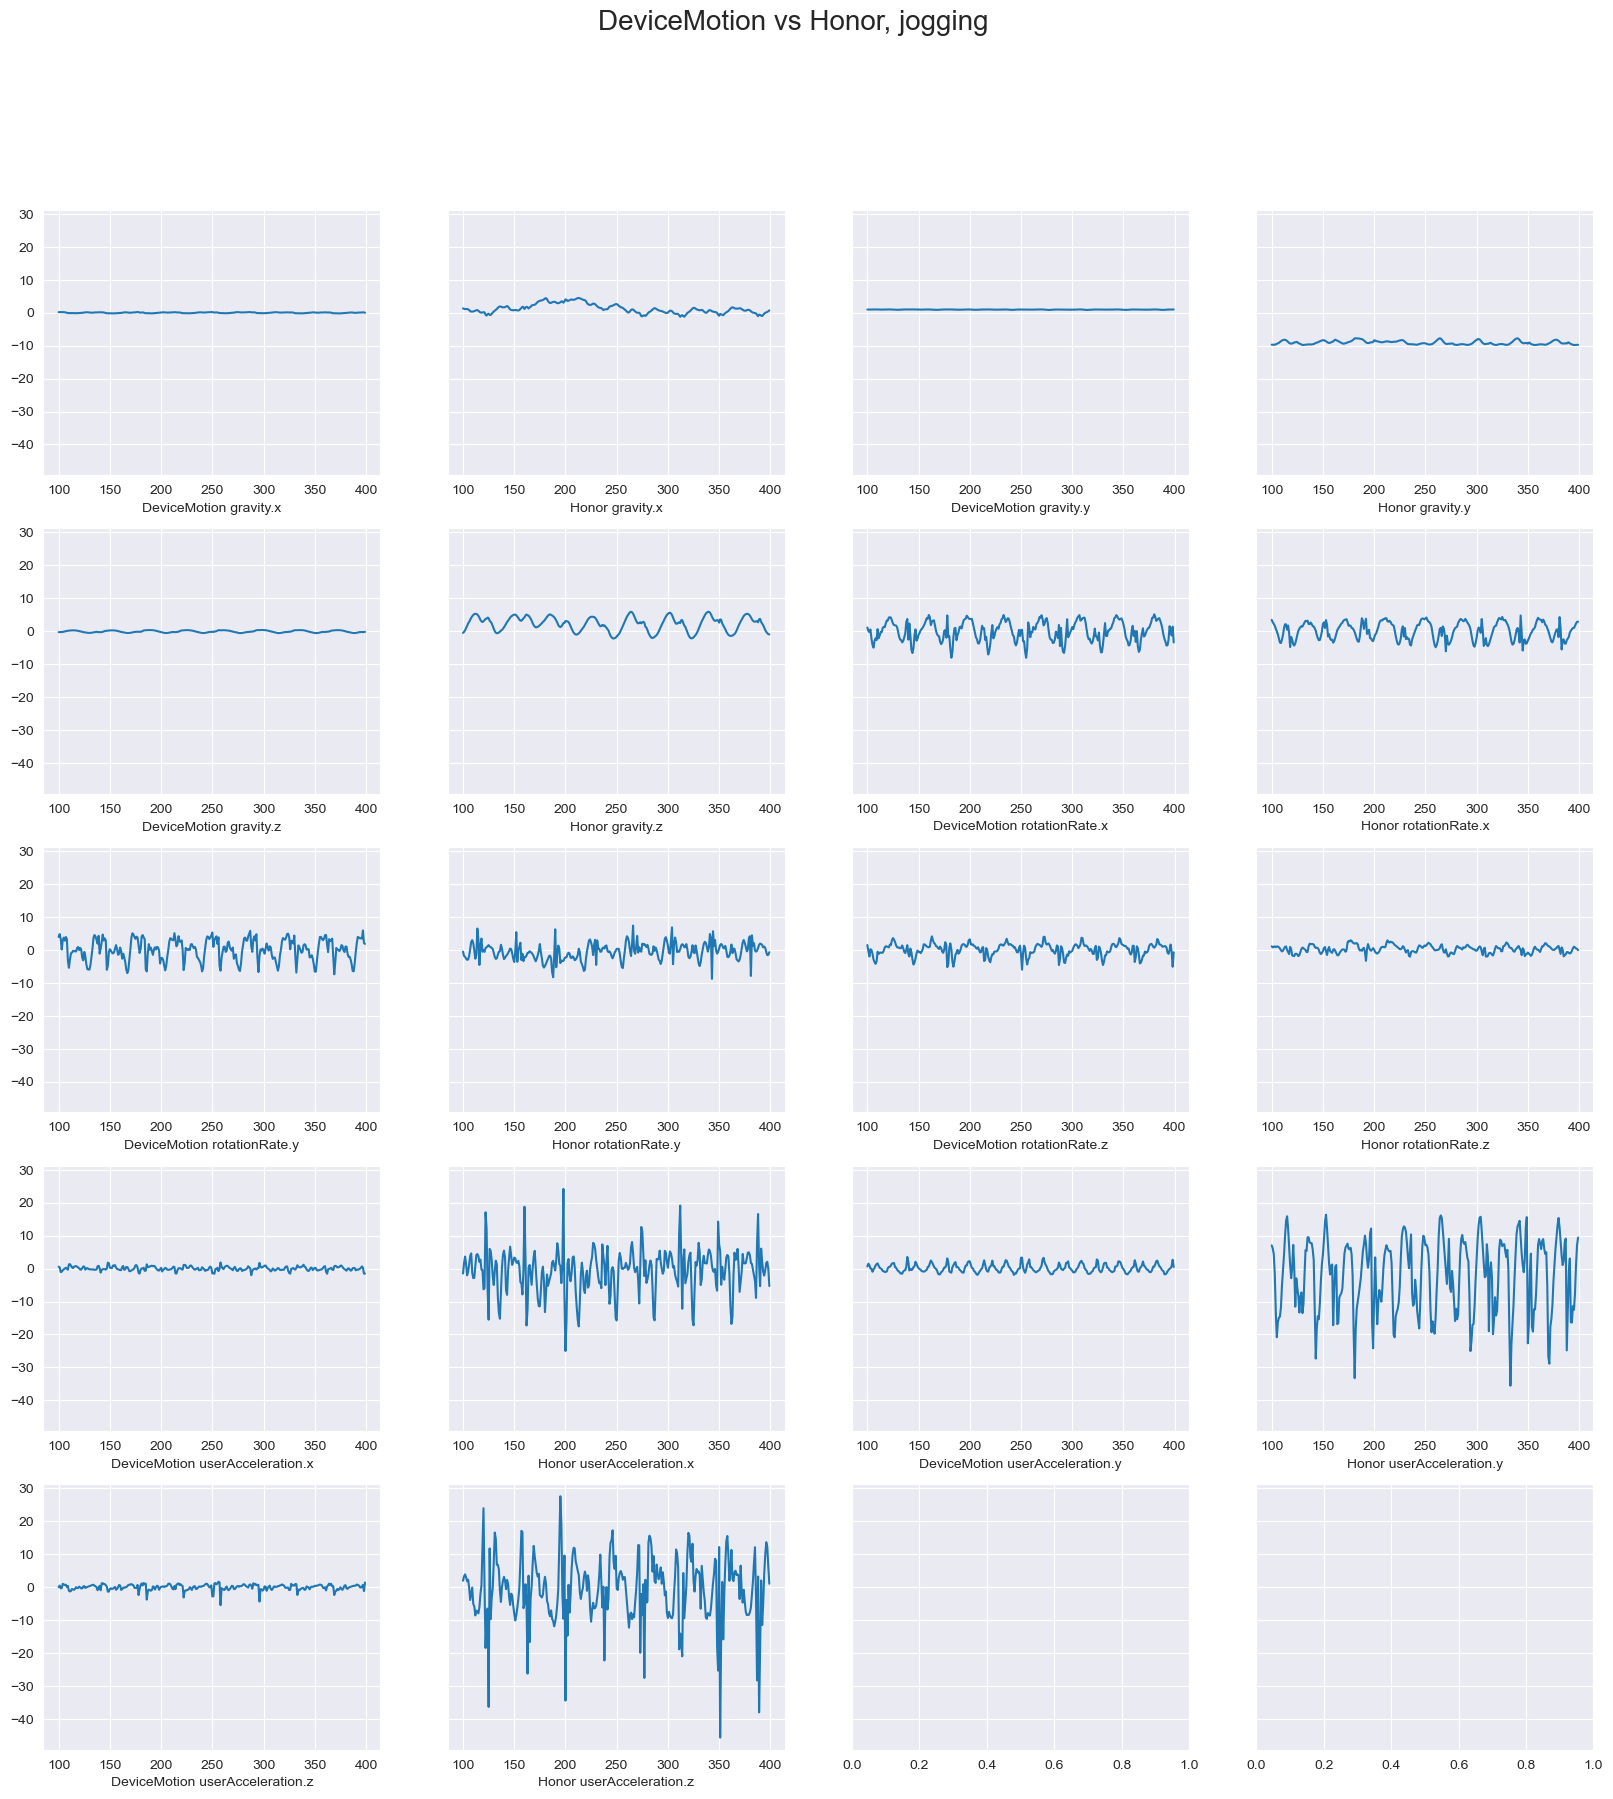

In [8]:
f, axes=plt.subplots(5, 4, figsize=(20,20), sharey=True)
f.suptitle("DeviceMotion vs Honor, jogging", fontsize=20)
i=0
j=0
for column in df_jog_deviceMotion:
    axes[i][j].plot(df_jog_deviceMotion[column])
    axes[i][j].set_xlabel("DeviceMotion "+column)
    j+=1
    axes[i][j].plot(df_jog_honor[column])
    axes[i][j].set_xlabel("Honor "+column)
    if j==3:
        j=0
        i+=1
    else: j+=1

We can easily see that sensors have a totally different scale. We then tried some multipliers to make phone signals have approximately the same range of MotionSense range (you can find these multipliers inside  **scale_readings** in the .py file.

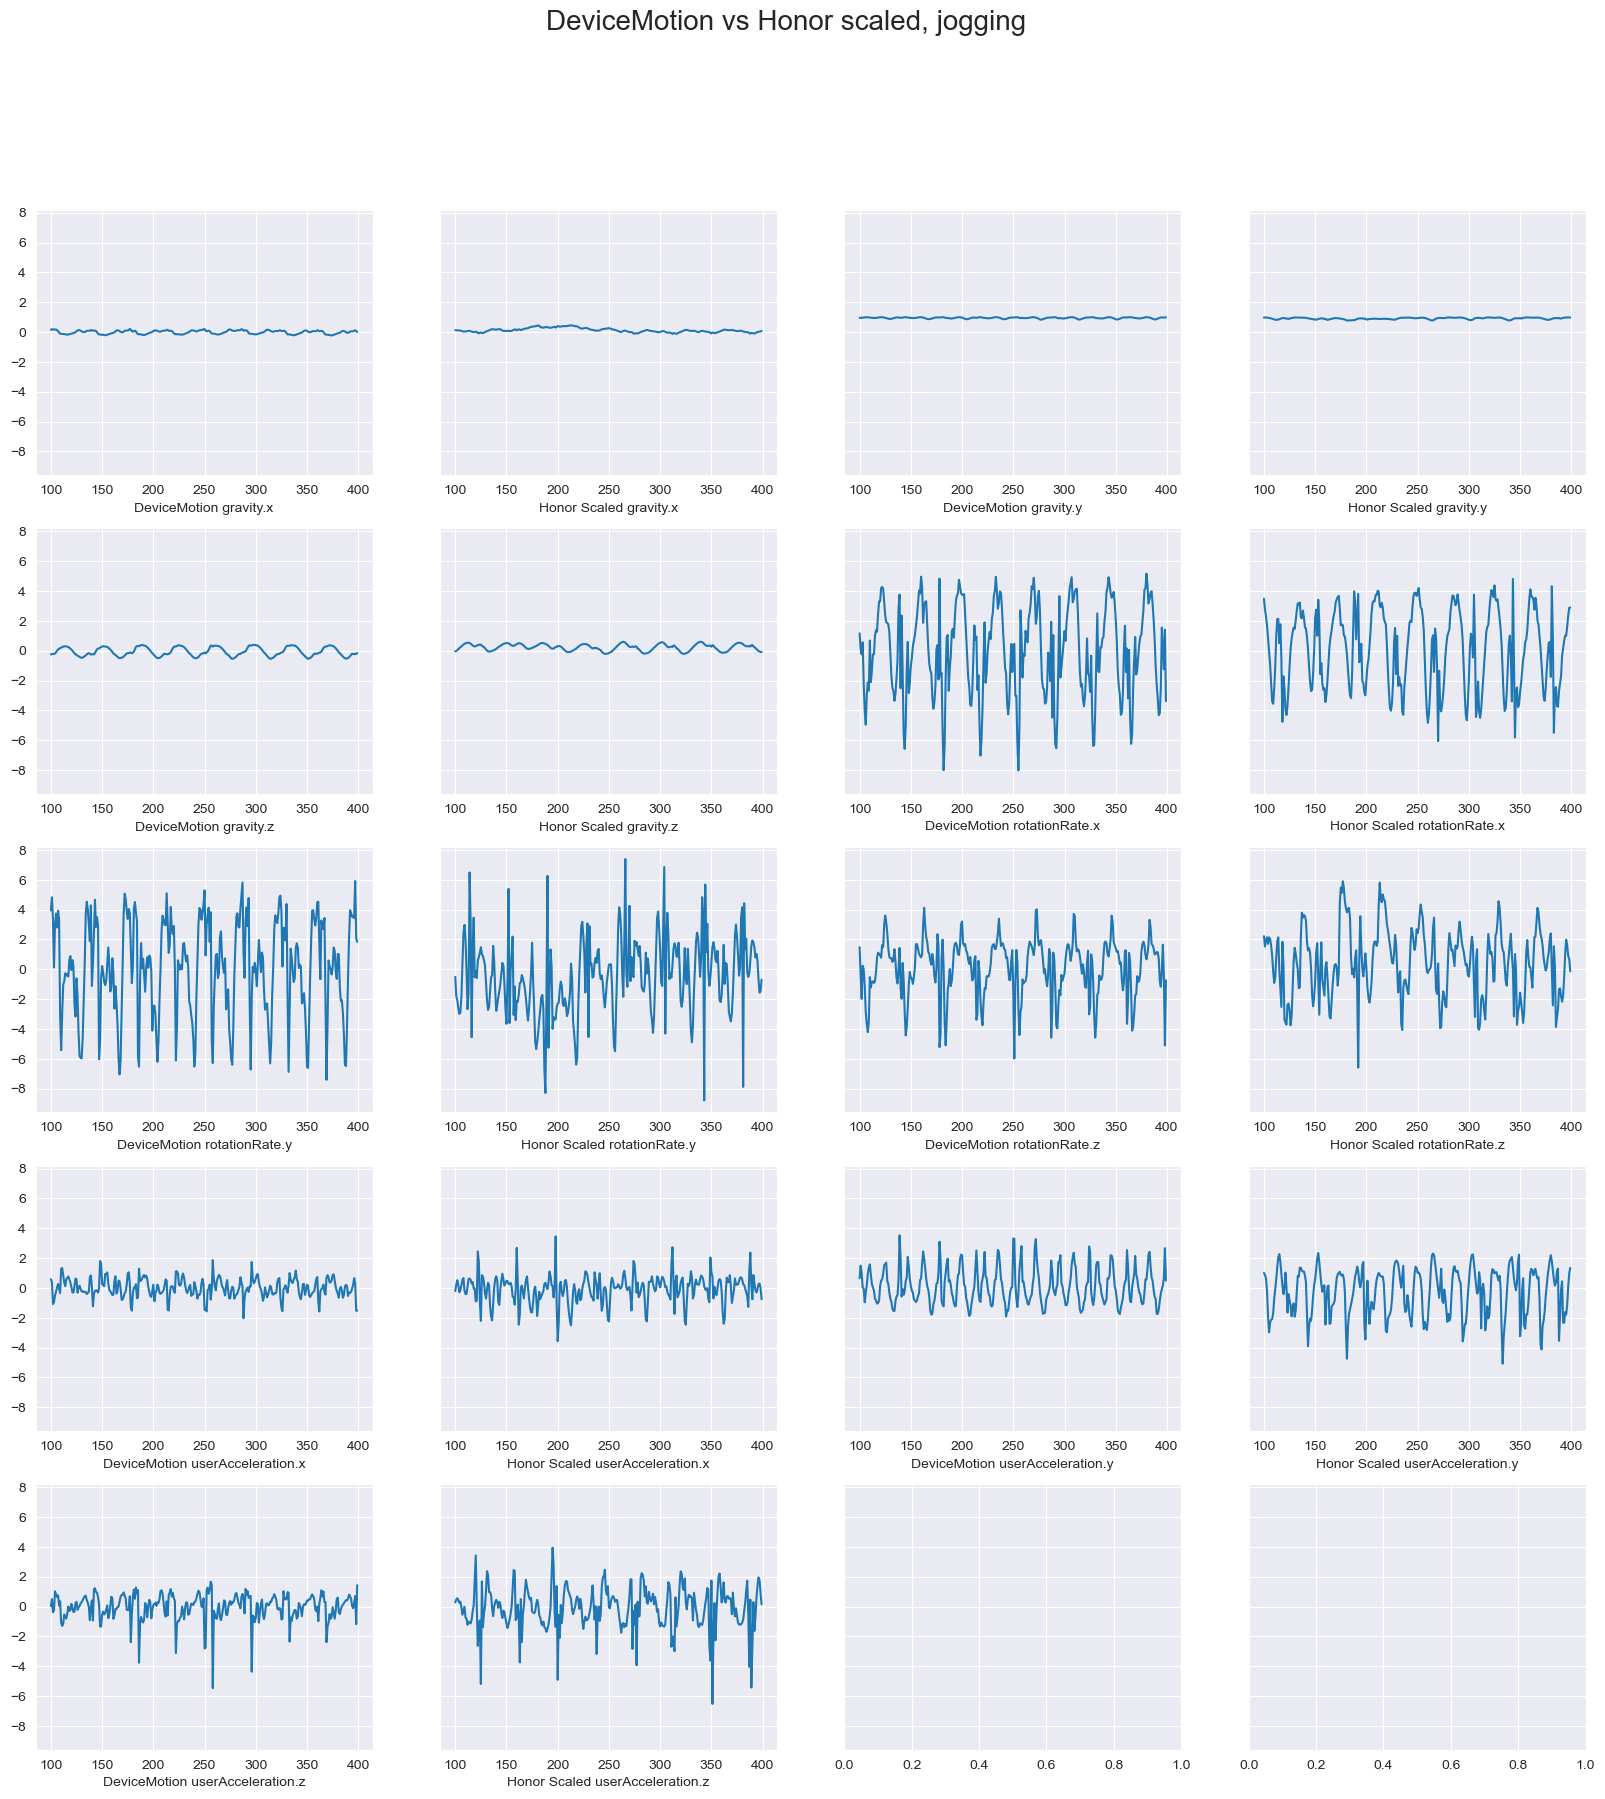

In [9]:
from creation_functions.utilities import scale_readings
df_jog_honor_scaled = scale_readings(df_jog_honor)
f, axes=plt.subplots(5, 4, figsize=(20,20), sharey=True)
f.suptitle("DeviceMotion vs Honor scaled, jogging", fontsize=20)
i=0
j=0
for column in df_jog_deviceMotion:
    axes[i][j].plot(df_jog_deviceMotion[column])
    axes[i][j].set_xlabel("DeviceMotion "+column)
    j+=1
    axes[i][j].plot(df_jog_honor_scaled[column])
    axes[i][j].set_xlabel("Honor Scaled "+column)
    if j==3:
        j=0
        i+=1
    else: j+=1

In [10]:
df_honor_scaled= create_time_series(mode="phone_scaled")
df_honor_scaled = df_honor_scaled.fillna(df_honor_scaled.groupby('class').transform('mean'))
for column in df_honor_scaled.columns:
    if column not in df_train.drop(["subject", "trial"], axis=1).columns:
        df_honor_scaled = df_honor_scaled.drop(column, axis=1)

Processing file: honor20readings_complete\dataset_honor20_dws1.csv
Processing file: honor20readings_complete\dataset_honor20_dws2.csv
Processing file: honor20readings_complete\dataset_honor20_dws3.csv
Processing file: honor20readings_complete\dataset_honor20_dws4.csv
Processing file: honor20readings_complete\dataset_honor20_dws5.csv
Processing file: honor20readings_complete\dataset_honor20_jog1.csv
Processing file: honor20readings_complete\dataset_honor20_jog2.csv
Processing file: honor20readings_complete\dataset_honor20_sit1.csv
Processing file: honor20readings_complete\dataset_honor20_sit2.csv
Processing file: honor20readings_complete\dataset_honor20_std1.csv
Processing file: honor20readings_complete\dataset_honor20_std2.csv
Processing file: honor20readings_complete\dataset_honor20_ups1.csv
Processing file: honor20readings_complete\dataset_honor20_ups2.csv
Processing file: honor20readings_complete\dataset_honor20_ups3.csv
Processing file: honor20readings_complete\dataset_honor20_ups4

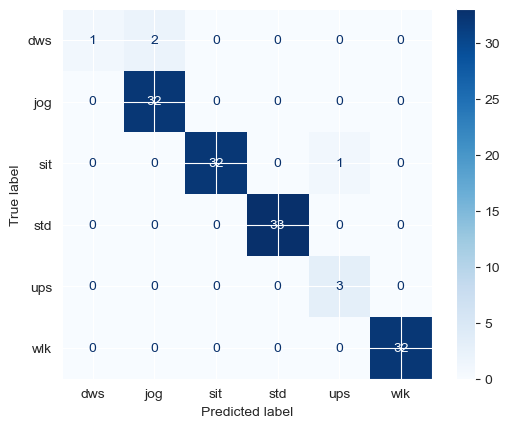

In [11]:
X_test_scaled = df_honor_scaled.drop("class", axis=1)
y_test_scaled = df_honor_scaled["class"]
y_pred_scaled = tree_pipe.predict(X_test_scaled)
ConfusionMatrixDisplay.from_predictions(y_test_scaled, y_pred_scaled, display_labels=df_train["class"].unique(), cmap=plt.cm.Blues)
count=0
y_test_scaled = y_test_scaled.to_numpy()
for i in range(0, y_pred_scaled.size):
    if y_pred_scaled[i]==y_test_scaled[i]:
        count+=1
acc_phone=count/y_pred_scaled.size


X_train_dm, X_test_dm, y_train_dm, y_test_dm = train_test_split(X_train, y_train, shuffle=True, random_state=42)
tree_pipe.fit(X_train_dm, y_train_dm)
y_pred_dm = tree_pipe.predict(X_test_dm)
count=0
for true, predicted in zip(y_test_dm, y_pred_dm):
    if true==predicted:
        count+=1
acc=count/y_pred_dm.size

[Text(0.5, 0, 'Dataset'), Text(0, 0.5, 'Accuracy')]

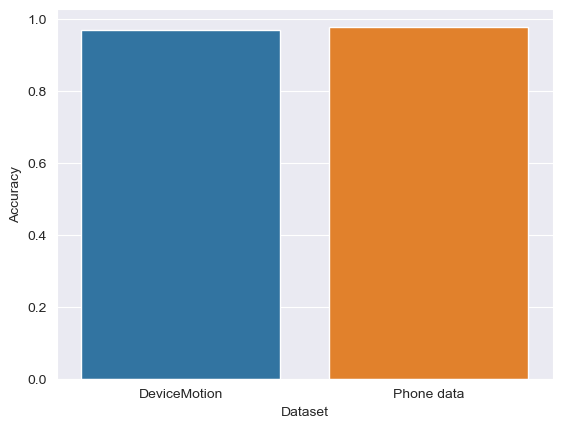

In [12]:
ax=sns.barplot(x=["DeviceMotion","Phone data"], y=[acc, acc_phone])
ax.set(xlabel="Dataset", ylabel="Accuracy")

#### Conclusions
Our algorithm is not natively general, we see that just putting unseen data with our preprocessing step from unknown phones can lead to unexpected results. We however prove that, if we are able to find sensors differences, and we can then scale signals according to these differences, then the accuracy improves a lot, reaching normal performance obtained with the original dataset.